In [1]:
import cv2
import pytesseract

In [20]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
pytesseract.pytesseract.tesseract_cmd="C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe"

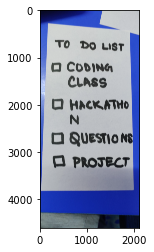

In [7]:
img1=cv2.imread("C:/Users/SHUBHIKA/Desktop/3.jpg")
imgConverted=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1)

In [25]:
# preprocessing
# gray scale
def gray(img):
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(r"./preprocess/img_gray.png",img)
    return img

# blur
def blur(img) :
    img_blur = cv2.GaussianBlur(img,(5,5),0)
    cv2.imwrite(r"./preprocess/img_blur.png",img)    
    return img_blur

# threshold
def threshold(img):
    #pixels with value below 100 are turned black (0) and those with higher value are turned white (255)
    img = cv2.threshold(img, 100, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)[1]    
    cv2.imwrite(r"./preprocess/img_threshold.png",img)
    return img

In [29]:
# Finding contours 
im_gray = gray(imgConverted)
im_blur = blur(im_gray)
im_thresh = threshold(im_blur)

contours, _ = cv2.findContours(im_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

In [30]:
# text detection
def contours_text(orig, img, contours):
    for cnt in contours: 
        x, y, w, h = cv2.boundingRect(cnt) 

        # Drawing a rectangle on copied image 
        rect = cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 255, 255), 2) 
        
        cv2.imshow('cnt',rect)
        cv2.waitKey()

        # Cropping the text block for giving input to OCR 
        cropped = orig[y:y + h, x:x + w] 

        # Apply OCR on the cropped image 
        config = ('-l eng --oem 1 --psm 3')
        text = pytesseract.image_to_string(cropped, config=config) 

        print(text)

In [ ]:
contours_text(img1,imgConverted,contours)